  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.7.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
Using cached torch-2.7.1-cp312-cp312-win_amd64.whl (216.1 MB)
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
   ---------------------------------------- 0.0/199.6 kB ? eta -:--:--
   -- ------------------------------------- 10.2/199.6 kB ? eta -:--:--
   ------ -------------------------------- 30.7/199.6 kB 445.2 kB/s eta 0:00:01
   ------------ -------------------------- 61.4/199.6 kB 656.4 kB/s eta 0:00:01
   ---------------------------------------- 199.6/199.6 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB 8.9 MB/s eta 0:00:01
   -------- ----------------

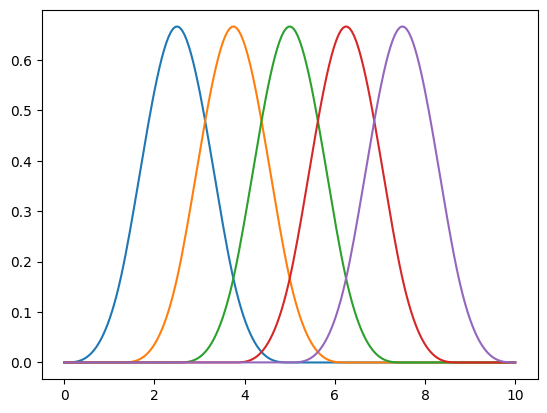

In [2]:
!pip install torch

#Python 3.12.4 miniconda3
import SplinesNLines
import numpy as np
import matplotlib.pyplot as plt 
m = 2 
B = 5
T = np.linspace(0,10, B+m+2)
x_e = np.linspace(0, 10, 200)
X = SplinesNLines.get_basis_mat_B_Spline(x_e, B, m, T)
plt.plot(x_e, X)
plt.show()

In [ ]:
import SplinesNLines
import numpy as np
import torch

m = 2 
B = 5
O = 850
T = np.linspace(0,10, B+m+2)
Lp = 3
np.random.seed(201763)
mu = np.array([1.0, 3.0, 4.0, 1.5, np.pi, -1, 2.3, 0.7])
L = np.random.normal(size = B + Lp).reshape(-1,1)
S = 10*L@L.T + 2*np.eye(B + Lp)

print(S)

O0 = np.random.multivariate_normal(mean = mu, cov = S, size = O)

K_vec = np.random.randint(50, 100, O)


X_a = []
f_a = []
T_a = []

for o in range(O):
    Tau = np.sort(np.random.uniform(size = K_vec[o]))
    To = np.random.uniform(0,10, size = K_vec[o])
    X_B = SplinesNLines.get_basis_mat_B_Spline_opt(To, B, m, T)
    X_L = SplinesNLines.eval_Line_Profiles_opt(To, loc_vals= np.array([1.5, 3.5, 7.5]), width_vals= np.array([1, 2.0, 0.5]))
    X = np.hstack((X_B, X_L))
    f = np.random.multivariate_normal(mean = X@O0[o, :], cov = np.diag(1/Tau), size = 1 )
    X_a.append(X)
    T_a.append(np.diag(Tau))
    f_a.append(f.T)

A = SplinesNLines.get_mat_comp(X_a, f_a, T_a)
l = A['XtTX'][5]

L = SplinesNLines.EM_alg(A['XtXf'], A['XtTX'], n_max = 10000, tol = 1e-10)

mu_h = L['mu_h']
S_h = L['S_h']
mu = torch.from_numpy(mu)


print("Absolute error for mu in % ")
print(100*torch.abs(mu_h - mu.reshape(-1,1) )/torch.abs(mu.reshape(-1,1)))

S= torch.from_numpy(S)
print("Absolute error for S entries in %")
print(100*torch.abs(S - S_h)/torch.abs(S))



print()
print()
print("Values for mu and S")
print(mu_h)
print(S_h)




[[ 5.42284819 -5.46994599  2.97802671 -0.53924924  1.34561772  4.17983902
  -0.87197094 -0.84593106]
 [-5.46994599 10.74134859 -4.75909079  0.86175724 -2.15038934 -6.67966923
   1.39346932  1.35185581]
 [ 2.97802671 -4.75909079  4.59101269 -0.46917028  1.17074591  3.63664164
  -0.75865262 -0.73599679]
 [-0.53924924  0.86175724 -0.46917028  2.08495549 -0.21199402 -0.65850861
   0.1373738   0.13327137]
 [ 1.34561772 -2.15038934  1.17074591 -0.21199402  2.5290001   1.64321207
  -0.34279626 -0.33255925]
 [ 4.17983902 -6.67966923  3.63664164 -0.65850861  1.64321207  7.10424456
  -1.06481443 -1.03301562]
 [-0.87197094  1.39346932 -0.75865262  0.1373738  -0.34279626 -1.06481443
   2.22213469  0.21550103]
 [-0.84593106  1.35185581 -0.73599679  0.13327137 -0.33255925 -1.03301562
   0.21550103  2.20906547]]
Iteration:   0
Iteration:   1000
Iteration:   2000
Iteration:   3000
Iteration:   4000
Iteration:   5000
Iteration:   6000
Iteration:   7000
Iteration:   8000
Iteration:   9000
Absolute error

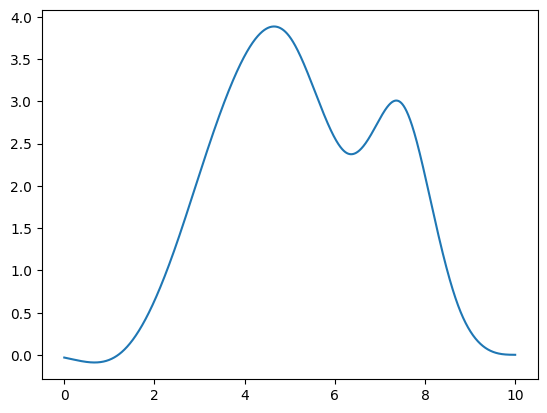

In [10]:
import matplotlib.pyplot as plt 


x_e = np.linspace(0, 10, num = 2000)
X_mu = np.hstack(( SplinesNLines.get_basis_mat_B_Spline_opt(x_e, B, m, T), SplinesNLines.eval_Line_Profiles_opt(x_e, loc_vals= np.array([1.5, 3.5, 7.5]), width_vals= np.array([1, 2.0, 0.5]))      )    )
f_mu = torch.from_numpy(X_mu)@mu 



plt.plot(x_e, f_mu)
plt.show()